# Image Classification with Python and Pytorch: Chest X-ray

by: Daniel E. Diaz Almeida.

In [35]:
# importing standard libraries
import os
import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# importing DL libraries for modeling
import torch
import torchmetrics
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

mpl.rcParams["font.size"] = 8

plt.style.use("fivethirtyeight")

print(os.sys.version)
print(torch.__version__)

3.8.10 (v3.8.10:3d8993a744, May  3 2021, 09:09:08) 
[Clang 12.0.5 (clang-1205.0.22.9)]
2.0.1


In [4]:
PATH = "/Users/danieldiazalmeida/Documents/Kaggle/data"
data_path = os.path.join(PATH, "Covid19-image_dataset")

In [5]:
def get_data(path:str, cat:str)->list:
    """
    """
    data_dir = os.path.join(path, cat)
    return os.listdir(data_dir)


def get_n_samples(path:str, cat:str)->tuple:
    """
    """
    n_train_norm = get_data(path+'/'+"train/", cat)
    n_test_norm = get_data(path+'/'+"test/", cat)

    n_train_samples = len(n_train_norm)
    n_test_samples = len(n_test_norm)

    return (n_train_samples, n_test_samples)


def n_samples_print(n_samples:float, cat:str, type:str)-> None:
    print(f"For {cat} there are {n_samples} in {type} dataset")


def samples_comparison_barplot(x, height, ylabel:str="N° of samples")->None:
    plt.bar(x, height)
    plt.ylabel(ylabel)
    plt.title("Number of Samples per set Comparison")
    plt.show()


data_label = ["Normal", "Covid", "Viral Pneumonia"]

## Chest X-ray Dataset Exploration

For Normal there are 70 in train dataset
For Normal there are 20 in test dataset


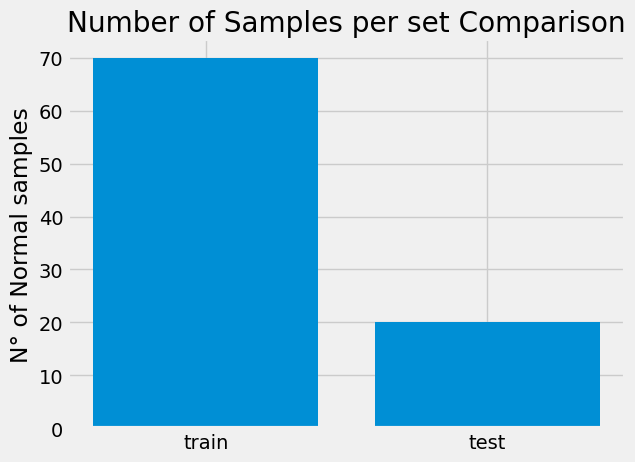

In [6]:
# NORMAL category
n_train_samples, n_test_samples =\
      get_n_samples(path=data_path, cat=data_label[0])

n_samples_print(n_samples=n_train_samples, cat=data_label[0], type="train")
n_samples_print(n_samples=n_test_samples, cat=data_label[0], type="test")

samples_comparison_barplot(x=["train", "test"]
                           ,height=[n_train_samples, n_test_samples]
                           ,ylabel="N° of Normal samples")

For Covid there are 111 in train dataset
For Covid there are 26 in test dataset


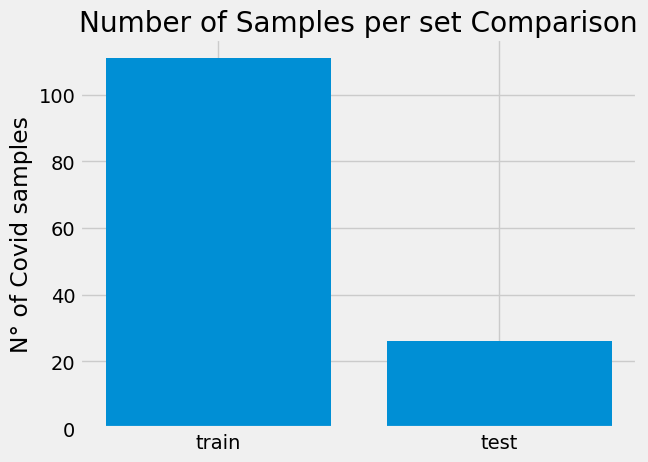

In [7]:
# PNEUMONIA category
cv_train_samples, cv_test_samples =\
      get_n_samples(path=data_path, cat=data_label[1])

n_samples_print(n_samples=cv_train_samples, cat=data_label[1], type="train")
n_samples_print(n_samples=cv_test_samples, cat=data_label[1], type="test")

samples_comparison_barplot(x=["train", "test"]
                           ,height=[cv_train_samples, cv_test_samples]
                           ,ylabel=f"N° of {data_label[1]} samples")

For Viral Pneumonia there are 70 in train dataset
For Viral Pneumonia there are 20 in test dataset


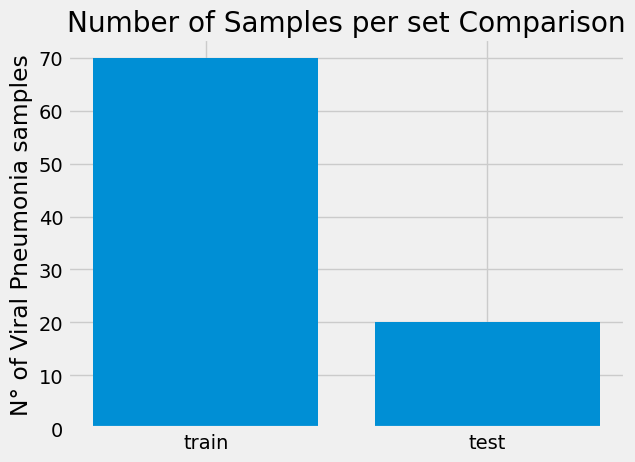

In [8]:
# PNEUMONIA category
pn_train_samples, pn_test_samples =\
      get_n_samples(path=data_path, cat=data_label[2])

n_samples_print(n_samples=pn_train_samples, cat=data_label[2], type="train")
n_samples_print(n_samples=pn_test_samples, cat=data_label[2], type="test")

samples_comparison_barplot(x=["train", "test"]
                           ,height=[pn_train_samples, pn_test_samples]
                           ,ylabel=f"N° of {data_label[2]} samples")

In [9]:
total_normal_samples = n_train_samples + n_test_samples
total_pneumonia_samples = pn_train_samples + pn_test_samples
total_covid_samples = cv_train_samples + cv_test_samples

print(f"The total number of samples is {total_normal_samples + total_pneumonia_samples + total_covid_samples}")
n_samples_print(n_samples=total_normal_samples, cat=data_label[0], type='all')
n_samples_print(n_samples=total_covid_samples, cat=data_label[1], type="all")
n_samples_print(n_samples=total_covid_samples, cat=data_label[2], type="all")

The total number of samples is 317
For Normal there are 90 in all dataset
For Covid there are 137 in all dataset
For Viral Pneumonia there are 137 in all dataset


In [15]:
def proportion_comparison_plot(
      size1:list, size2:list, size3:list, labels:list, title1:str, title2:str, title3:str  
    )-> None:
    fig, ax = plt.subplots(figsize=(10,10), ncols=3)
    ax[0].pie(size1
            ,labels=labels
            ,autopct="%1.1f%%")
    ax[0].set_title(title1)
    ax[1].pie(size2
            ,labels=labels
            ,autopct="%1.1f%%")
    ax[1].set_title(title2)
    ax[2].pie(size3
            ,labels=labels
            ,autopct="%1.1f%%")
    ax[2].set_title(title3)
    fig.tight_layout()
    plt.show()
    

def proportion_comparison_plot_v2(
      size1:list, size2:list, size3:list, labels:list, title1:str, title2:str  
    )-> None:
    fig, ax = plt.subplots(figsize=(10,10), ncols=2)
    ax[0].pie(size1
            ,labels=labels
            ,autopct="%1.1f%%")
    ax[0].set_title(title1)
    ax[1].pie(size2
            ,labels=labels
            ,autopct="%1.1f%%")
    ax[1].set_title(title2)
    fig.tight_layout()
    plt.show()


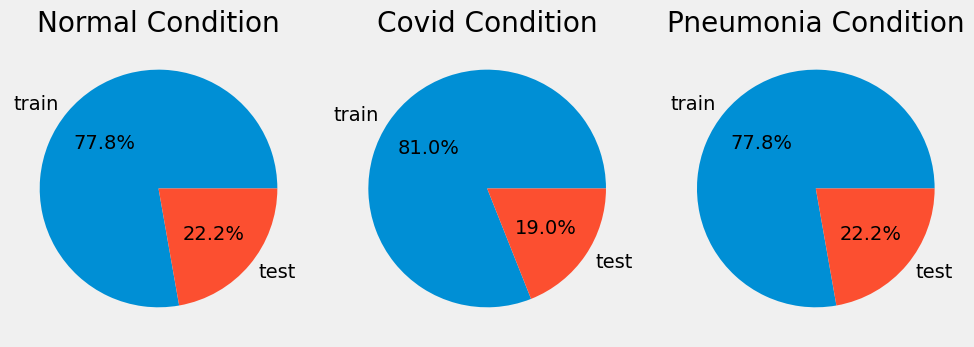

In [13]:
proportion_comparison_plot(
      size1=[n_train_samples, n_test_samples]
      ,size2=[cv_train_samples, cv_test_samples]
      ,size3=[pn_train_samples, pn_test_samples]
      ,labels=["train", "test"]
      ,title1="Normal Condition"
      ,title2="Covid Condition"
      ,title3="Pneumonia Condition"
    )

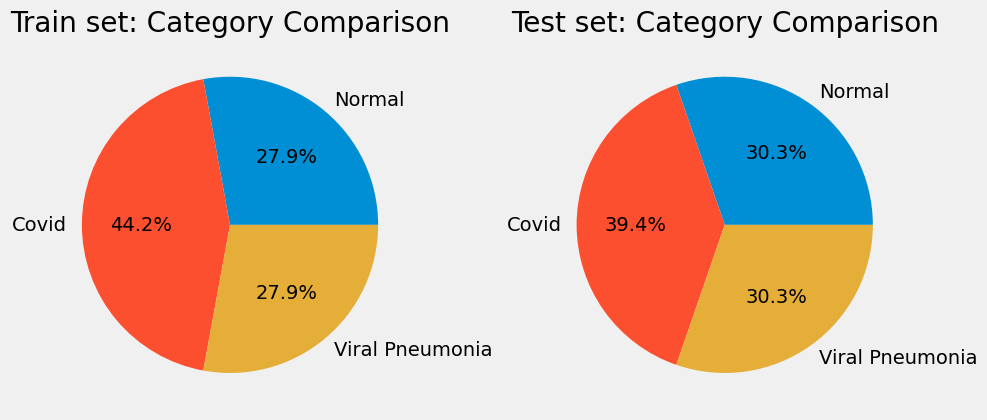

In [16]:
proportion_comparison_plot_v2(
      size1=[n_train_samples, cv_train_samples, pn_train_samples]
      ,size2=[n_test_samples, cv_test_samples, pn_test_samples]
      ,size3=[pn_train_samples, pn_test_samples]
      ,labels=data_label
      ,title1="Train set: Category Comparison"
      ,title2="Test set: Category Comparison"
    )

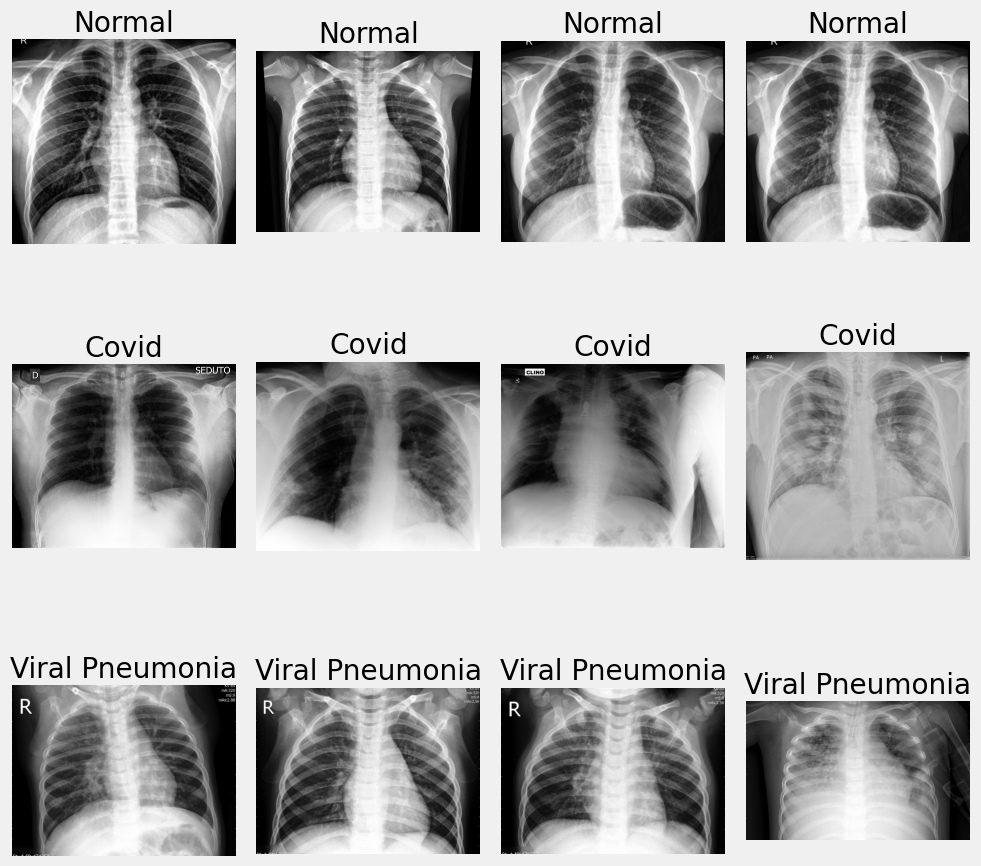

In [18]:
train_normal_dat = get_data(path=data_path+'/'+"train/", cat=data_label[0])
train_covid_dat = get_data(path=data_path+'/'+"train/", cat=data_label[1])
train_pneumo_dat = get_data(path=data_path+'/'+"train/", cat=data_label[2])

rand_norm_idx = np.random.randint(low=0, high=n_train_samples, size=4)
rand_covid_idx = np.random.randint(low=0, high=cv_train_samples, size=4)
rand_pneu_idx = np.random.randint(low=0, high=pn_train_samples, size=4)

idxs = np.concatenate([rand_norm_idx, rand_covid_idx, rand_pneu_idx])

dat = [train_normal_dat, train_covid_dat, train_pneumo_dat]

fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
for c in range(len(data_label)):
    i = 0
    while (2*i)/2 < 4:
        img = plt.imread(data_path+'/'+"train/"+data_label[c]+'/'+dat[c][idxs[i]])
        if img.dtype != int:
            img = np.array(img, dtype=int)
        ax[c, i].imshow(img)
        ax[c, i].set_title(data_label[c])
        ax[c, i].set_axis_off()
        i +=1
fig.tight_layout()
plt.show()


In [50]:
# number of positive (pneumonia) and negative (normal) samples
n_pos = pn_train_samples
n_neg = n_train_samples 
print(f"there are {n_pos} positve samples and {n_neg} negative samples in the train dataset.")

there are 3875 positve samples and 1342 negative samples in the train dataset.


In [51]:
# negative class weight: pneumonia / normal
pos_w = n_pos / n_neg
print(f"the weight for the imbalanced label is {pos_w}")

the weight for the imbalanced label is 2.8874813710879286


## Image Classification Model Development

### Datasets

The selected data transformation allows to perform data augmentation on the train dataset. The idea to carry out these transformation is to "increase" the data variability to avoid overfitting during training and poor generalization/inference on testing.

A custom function is defined and applied to determine both the mean and the standard deviation of this dataset. This function consists on taking ... This is done to normalize the data.

In [19]:
def loader_apply(loader, func, reduce='sum'):
    """_summary_

    Args:
        loader (_type_): _description_
        func (_type_): _description_
        reduce (str, optional): _description_. Defaults to 'sum'.

    Returns:
        _type_: _description_
    """
    results = [func(x,y) for i, (x,y) in enumerate(loader)]
    results = torch.stack(results, axis=0)
    
    if reduce == 'sum':
        results = results.sum(axis=0)
    if reduce == 'mean':
        results = results.float().mean(axis=0)
    
    return results


def channel_statistics(images, labels):
    """_summary_

    Args:
        images (_type_): _description_
        labels (_type_): _description_

    Returns:
        _type_: _description_
    """
    n_samples, n_channels, n_height, n_width = images.size()
    
    flatten_per_channel = images.reshape(n_samples, n_channels, -1)
    
    means = flatten_per_channel.mean(axis=2)
    stds = flatten_per_channel.std(axis=2)
    
    sum_means = means.sum(axis=0)
    sum_stds = stds.sum(axis=0)
    
    n_samples = torch.tensor([n_samples]*n_channels).float()
    
    #norm_mean = total_means / total_samples
    #norm_std = total_stds / total_samples
    
    return torch.stack([n_samples, sum_means, sum_stds], axis=0)


def images_normalizer(loader):
    """_summary_

    Args:
        loader (_type_): _description_

    Returns:
        _type_: _description_
    """
    total_samples, total_means, total_std = loader_apply(
        loader=loader
        ,func=channel_statistics
    )
    norm_mean = total_means / total_samples
    norm_std = total_std / total_samples
    
    return {"mean":norm_mean, "std":norm_std}

In [20]:
temp_transforms = transforms.Compose(
    [transforms.Resize(size=(28,28))
    ,transforms.ToTensor()]
)
temp_dataset = data_train = ImageFolder(
    root=os.path.join(data_path, 'train'),
    transform=temp_transforms
)

In [21]:
temp_loader = DataLoader(temp_dataset, batch_size=16)
first_im, first_label = next(iter(temp_loader))
channel_statistics(first_im, first_label)

tensor([[16.0000, 16.0000, 16.0000],
        [ 8.0384,  8.0384,  8.0384],
        [ 4.1816,  4.1816,  4.1816]])

In [22]:
normalizer = images_normalizer(temp_loader)

In [83]:
# Data Augmentation
train_transforms = transforms.Compose([
    transforms.Resize(size=(100, 100))
    ,transforms.Grayscale(num_output_channels=1)
    ,transforms.RandomPerspective()
    ,transforms.RandomHorizontalFlip()
    ,transforms.RandomVerticalFlip(p=0.5)
    ,transforms.RandomRotation(45)
    ,transforms.ToTensor()
    ,transforms.Normalize(mean=normalizer["mean"][0]
                          ,std=normalizer["std"][0])
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(100, 100))
    ,transforms.Grayscale(num_output_channels=1)
    ,transforms.ToTensor()
    ,transforms.Normalize(mean=normalizer["mean"][0]
                          ,std=normalizer["std"][0])

])

*Data Augmentation:* Generating `more data` by applying `random transformations` to original images.
* Increase the size and diversity of the training set;
* Improve model robustness;
* Reduce overfitting

A class inheriting from the Pytorch Dataset class is defined. This class allows to retrieve images from the dataset as well as to label them according to the subfolder where are stored.

In [123]:
class XRayData(Dataset):
    def __init__(self, image_path, category=None, transform=None):
        super().__init__()
        # class attributes
        self.cat = category
        self.root = image_path
        self.transform = transform
        self.imgs = []
        self.label = []
        self.imgs, self.label = self.get_data()

    # method to get subfolder list inside train/test folder 
    def get_subfolder(self)->list:
        data_dir = os.path.join(self.root, self.cat)
        return os.listdir(data_dir)

    
    # method to open an image sample
    def get_image(self, img):
        return Image.open(img)


    # method that allows to join the image tensor with its
    # corresponding label which is defined by data subfolder
    def get_data(self):
        labels = self.get_subfolder()
        labels.sort()
        for (i,l) in enumerate(labels[:]):
            path = os.path.join(self.root+'/'+self.cat, l)
            for file in os.listdir(path):
                self.imgs.append(
                    os.path.join(path,file)
                )
                self.label.append(i)
        return (self.imgs, self.label)


    # class method to retrieve the data to the DataLoader
    def __getitem__(self, idx):
        image, label = self.get_data()
        image = self.get_image(image[idx])
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label[idx]

    # class method to rewrite
    def __len__(self):
        return len(self.imgs)

In [124]:
train_dataset = XRayData(
    image_path=data_path, category="train", transform=train_transforms)

In [125]:
test_dataset = XRayData(
    image_path=data_path, category="test", transform=test_transforms)

Another and more direct way to retrieve images from the dataset is by using the `ImageFolder` class imported from torchvision.datasets. This class takes the root for the main folder (train or test) and the transformations to apply over the images in the subfolders. The label is automatically assigned to the image since it takes the subfolder name as the data label. So, it is important to store the data in well define subfolders each corresponding to the class label of interest.

```python
data_train = ImageFolder(
    root=os.path.join(data_path, 'train'),
    transform=train_transforms
)

train_dataloader = DataLoader(
    dataset=data_train,
    batch_size=1,
    shuffle=True
)


In [172]:
data_train = ImageFolder(
    root=os.path.join(data_path, 'train'),
    transform=train_transforms
)

data_test = ImageFolder(
    root=os.path.join(data_path, 'test'),
    transform=train_transforms
)

In [173]:
data_test.class_to_idx

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [189]:
g = torch.Generator().manual_seed(42)
train_loader = DataLoader(data_train,
                          batch_size=32, 
                          shuffle=True, generator=g)

test_dataloader = DataLoader(
    dataset=data_test,
    batch_size=32,
    shuffle=False
)

test_dataset_, val_dataset = random_split(data_test, [.90, .10], generator=g)

val_loader = DataLoader(
    val_dataset, 
    batch_size=32, 
    shuffle=False
    )


test_dataloader = DataLoader(
    test_dataset_, 
    batch_size=32, 
    shuffle=False
    )

Visualizing an instance image from both the training and testing DataLoaders. In the example image from the training DataLoader it can be observed the defined transformation: Random Rotation and Random horizontal flip, resizing and gray scaling. The only transformations that were applied to the test set are resizing and gray scaling.

The reason to turn the image into a gray scale is because it facilitates the training stage, that is, the model would train faster with images of a single channel.

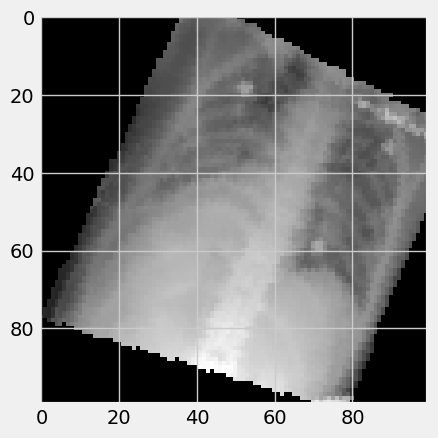

In [191]:
image, label = next(iter(train_loader))
# Reshape the image tensor
image = image[0].squeeze()#.permute(1, 2, 0) 
# Display the image
plt.imshow(image, cmap='gray')
plt.show()

## Model

In [177]:
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

device = torch.device("mps")
device

True
True


device(type='mps')

$$O_H = \lfloor\frac{H - K_H + 2P}{S_H}\rfloor + 1$$

In [212]:
class ImageClassifier(nn.Module):
    def __init__(self, n_classes):
        super(ImageClassifier, self).__init__()
        # Output= ((H_in + 2 * padding - dilatation * (kernel_size - 1) - 1)/stride + 1) = 50
        # Input = 1 x 100 x 100; Output = 256 x 50 x 50 --> Max Pool = 256 x 25 x 25
        self.conv1 =  nn.Conv2d(in_channels=1, out_channels=128, kernel_size=3, padding=1, stride=2)

        self.bn = nn.BatchNorm2d(num_features=128)

        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        
        self.bn2 = nn.BatchNorm2d(num_features=64)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
        
        self.bn3 = nn.BatchNorm2d(num_features=32)
        
        # H_in = 25, dilatation=1, kernelsize=3, stride=2, padding=1
        # output= ((H_in + 2 * padding - dilatation * (kernel_size - 1) - 1)/stride + 1) = 11
        self.classifier = nn.Sequential(
            nn.Flatten()
            ,nn.Linear(in_features=5*5*32, out_features=16)
            ,nn.ELU()
            ,nn.Linear(in_features=16, out_features=n_classes)
        )
    
    
    def forward(self, x):
        # Input = 1x100x100; Output = 512 x 50 x 50 --> Max Pool = 512 x 25 x 25
        x = self.bn(self.conv1(x))
        x = F.elu(x)
        x = self.pool(x)
        
        # Input = 512 x 25 x 25; Output = 256 x 25 x 25 --> Max Pool = 256 x 13 x 13
        x = self.bn2(self.conv2(x))
        x = F.elu(x)
        x = self.pool(x)
        
        # Input = 256 x 9 x 9; Output = 128 x 8 x 8 --> Max Pool = 64 x 4 x 4
        x = self.bn3(self.conv3(x))
        x = F.elu(x)
        x = self.pool(x)
        
        # making classification
        x = self.classifier(x)
        return x

In [213]:
model = ImageClassifier(n_classes=3).to(device=device)

In [214]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### Train utils

In [215]:
# Define precision metric
train_precision = torchmetrics.Precision(
    task='multiclass', num_classes=3, average="micro").to(device=device)
train_recall = torchmetrics.Recall(
    task="multiclass", num_classes=3, average="micro").to(device=device)

test_precision = torchmetrics.Precision(
    task='multiclass', num_classes=3, average="micro").to(device=device)
test_recall = torchmetrics.Recall(
    task="multiclass", num_classes=3, average="micro").to(device=device)

# Define training step
def training_step(model, train_loader, val_loader, optim, 
                  train_acc, val_acc, train_recall, test_recall, 
                  epoch):
    train_loss_list = []
    val_loss_list = []

    for i in range(epoch):
        training_loss = 0.0
        validation_loss = 0.0

        # put model in training mode
        model.train()
        for img_batch, label in train_loader:
            img_batch = img_batch.to(device=device)
            label = label.to(device=device)
            
            logit = model(img_batch)#.view(-1)
            loss = criterion(logit, label)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            training_loss += loss.item()
            
            # batch precision
            _, preds = torch.max(logit, 1)
            train_precision(preds, label)
            train_recall(preds, label)
            #print(f"Accuracy on batch {i}: {acc}")

        # metric on all batches using custom accumulation
        precision_train = train_precision.compute()
        recall_train = train_recall.compute()

        # put model in evaluation mode
        model.eval()
        # speed up the forward pass
        with torch.no_grad():
            for img_batch, label in val_loader:
                img_batch = img_batch.to(device=device)
                label = label.to(device=device)
                
                label_hat = model(img_batch)#.view(-1)
                val_loss = criterion(label_hat, label)
                
                validation_loss += val_loss.item()
                # batch precision
                _, preds = torch.max(label_hat, 1)
                test_precision(preds, label)
                test_recall(preds, label)
                #print(f"Accuracy on batch {i}: {acc}")

        # metric on all batches using custom accumulation
        precision_test = test_precision.compute()
        recall_test = test_recall.compute()

        if i%2==0:

            # metric on all batches using custom accumulation
            print(
                f"Epoch: {i+1}"
                f"\nPrecision on training data: {precision_train}"
                f"\nRecall on training data: {recall_train}"
                f"\nThe train loss is {training_loss / len(train_loader)}"
                f"\nPrecision on validation data: {precision_test}"
                f"\nRecall on validation data: {recall_test}"
                f"\nThe validation loss is {validation_loss / len(val_loader)}"
            )

            val_loss_list.append(validation_loss / len(val_loader))
            train_loss_list.append(training_loss / len(train_loader))

        # Reseting internal state such that metric ready for new data
        train_precision.reset()
        train_recall.reset()
        # Reseting internal state such that metric ready for new data
        test_precision.reset()
        test_recall.reset()


In [216]:
EPOCHS = 11
# Train the model
training_step(
    model, 
    train_loader=train_loader,
    val_loader=val_loader, 
    optim=optimizer, 
    train_acc=train_precision, 
    val_acc=test_precision,
    train_recall=train_recall, 
    test_recall=test_recall, 
    epoch=EPOCHS)

Epoch: 1
Precision on training data: 0.48605579137802124
Recall on training data: 0.48605579137802124
The train loss is 0.9612798392772675
Precision on validation data: 1.0
Recall on validation data: 1.0
The validation loss is 0.28310343623161316
Epoch: 3
Precision on training data: 0.717131495475769
Recall on training data: 0.717131495475769
The train loss is 0.6060868725180626
Precision on validation data: 0.6666666865348816
Recall on validation data: 0.6666666865348816
The validation loss is 0.618562638759613
Epoch: 5
Precision on training data: 0.8525896668434143
Recall on training data: 0.8525896668434143
The train loss is 0.3863411732017994
Precision on validation data: 1.0
Recall on validation data: 1.0
The validation loss is 0.16768793761730194
Epoch: 7
Precision on training data: 0.8446215391159058
Recall on training data: 0.8446215391159058
The train loss is 0.42323472164571285
Precision on validation data: 1.0
Recall on validation data: 1.0
The validation loss is 0.226016581

In [218]:
# Define precision metric
metric_precision = torchmetrics.Precision(
    task='multiclass', num_classes=3, average=None).to(device)
metric_recall = torchmetrics.Recall(
    task='multiclass', num_classes=3, average=None).to(device)

# Test the model
model.eval()
with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)
precision = metric_precision.compute()
recall = metric_recall.compute()

# Get precision per class
precision_per_class = {
    k: precision[v].item()
    for k, v 
    in data_test.class_to_idx.items()
}
# Get recall per class
recall_per_class = {
    k: recall[v].item()
    for k, v 
    in data_test.class_to_idx.items()
}
print(precision_per_class)
print(recall_per_class)

{'Covid': 1.0, 'Normal': 0.46666666865348816, 'Viral Pneumonia': 1.0}
{'Covid': 0.8461538553237915, 'Normal': 1.0, 'Viral Pneumonia': 0.4000000059604645}
